In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

weather_api_key ="10790c53549aaaa4f85d1d15a7597347"

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

612

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")

City processed: chokurdakh
City processed: chuy
City processed: svetlyy
City processed: carnarvon
City processed: albany
City processed: cape town
City processed: zhigansk
City processed: moundou
City processed: barrow
City processed: atuona
City NOT found: tidore
City processed: touros
City processed: lavrentiya
City processed: miracema do tocantins
City NOT found: tabialan
City NOT found: sedelnikovo
City processed: east london
City processed: dikson
City processed: lasa
City NOT found: taolanaro
City processed: punta arenas
City processed: loukhi
City processed: qaanaaq
City processed: berdigestyakh
City NOT found: uroteppa
City processed: nikolskoye
City processed: tomatlan
City processed: bay-ang
City processed: goderich
City processed: lorengau
City processed: saint george
City processed: geraldton
City processed: katsuura
City processed: ushuaia
City processed: talnakh
City NOT found: illoqqortoormiut
City processed: fort nelson
City NOT found: samusu
City processed: taybad
City

City processed: vila velha
City processed: inongo
City processed: mareeba
City processed: morehead
City processed: muros
City processed: ocean city
City processed: pundaguitan
City processed: kuvandyk
City processed: kalininsk
City processed: pevek
City processed: melipilla
City processed: boende
City processed: piotrkow trybunalski
City processed: arona
City NOT found: leghorn
City processed: porto murtinho
City processed: veraval
City processed: areosa
City processed: sovetskiy
City processed: nova bana
City processed: tripoli
City NOT found: galiwinku
City processed: pontes e lacerda
City processed: coahuayana
City processed: vila franca do campo
City processed: bamora
City processed: sao joao da barra
City processed: chaplynka
City processed: oliver
City processed: sola
City processed: indianola
City NOT found: attawapiskat
City processed: bengkulu
City processed: viet tri
City processed: saint-pierre
City processed: vetlanda
City processed: pangnirtung
City NOT found: bolungarvik


In [4]:
weather = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [5]:
weather.to_csv(r'\Users\harol\Desktop\Python API\output_data\cities.csv', index = False)
weather

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,chokurdakh,RU,-10.97,99,98,2.84,70.6333,147.9167,1634953102
1,chuy,UY,57.79,71,100,5.17,-33.6971,-53.4616,1634953292
2,svetlyy,RU,41.05,69,36,21.56,54.6750,20.1347,1634953133
3,carnarvon,AU,80.67,29,0,14.97,-24.8667,113.6333,1634953097
4,albany,US,48.15,81,48,5.23,42.6001,-73.9662,1634953013
...,...,...,...,...,...,...,...,...,...
557,haines junction,CA,37.35,87,100,3.44,60.7522,-137.5108,1634953497
558,bathsheba,BB,83.01,69,20,24.16,13.2167,-59.5167,1634953498
559,mongoumba,CF,69.80,95,78,1.68,3.6415,18.5936,1634953498
560,truckee,US,49.62,92,90,5.75,39.3280,-120.1833,1634953436


In [6]:
updated_city = weather[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]

updated_city.to_csv(r'/Users\harol\Desktop\Python API\output_data\updated_city.csv', index = False)
updated_city.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,chokurdakh,RU,70.6333,-10.97,99,98,2.84,1634953102
1,chuy,UY,-33.6971,57.79,71,100,5.17,1634953292
2,svetlyy,RU,54.6750,41.05,69,36,21.56,1634953133
3,carnarvon,AU,-24.8667,80.67,29,0,14.97,1634953097
4,albany,US,42.6001,48.15,81,48,5.23,1634953013


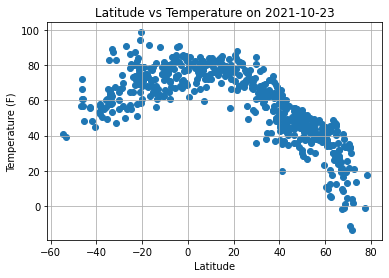

In [7]:
endRunDate = updated_city["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

x = updated_city["Latitude"]
y = updated_city["Temperature"]
plt.scatter(x,y)
plt.grid()
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig('output_data/LatitudevsTemperature.png')
plt.show()

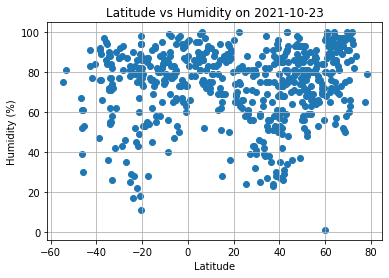

In [8]:
h = updated_city["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('output_data/LatitudevsHumidity.png')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

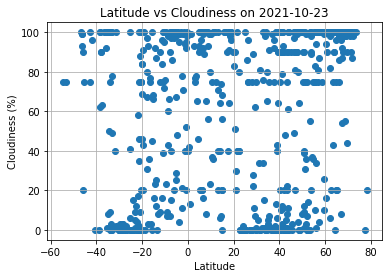

In [9]:

c = updated_city["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('output_data/LatitudevsCloudiness.png')
plt.show

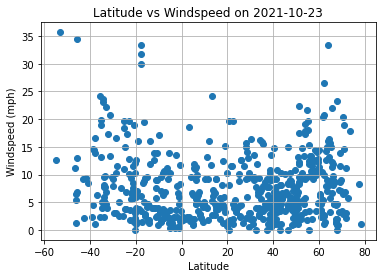

In [10]:
ws = updated_city["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig('output_data/LatitudevsWindspeed.png')
plt.show()

In [11]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()


In [12]:
Northern_DF = weather.loc[weather["Latitude"] > 0]
Southern_DF = weather.loc[weather["Latitude"] < 0]

The r-square is -0.8771540029702098
y = -0.92x + 89.7


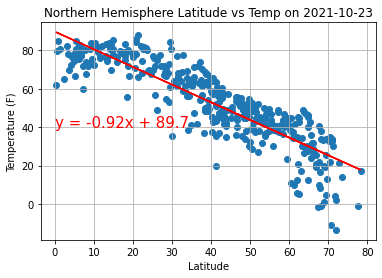

In [13]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
regEQplotX = 0
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig('output_data/NorthernHemisphereLatitudevsTemp.png')
plt.show()

The r-square is 0.6060101884313173
y = 0.53x + 80.89


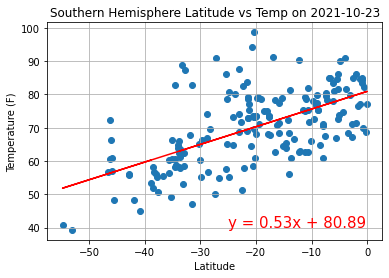

In [14]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig('output_data/SouthernHemisphereLatitudevsTemp.png')
plt.show()

The r-square is 0.08392355278753534
y = 0.08x + 71.29


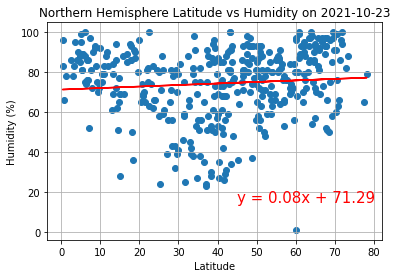

In [15]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig('output_data/NorthernHemisphereLatitudevsHumidity.png')
plt.show()

The r-square is 0.1541422800594307
y = 0.23x + 77.25


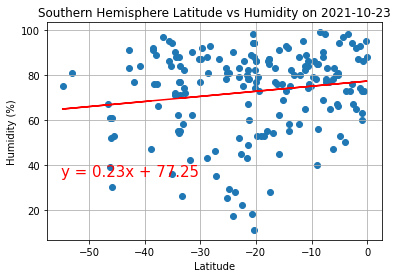

In [16]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig('output_data/SouthernHemisphereLatitudevsHumidity.png')
plt.show()

The r-square is 0.16144244307807631
y = 0.33x + 46.57


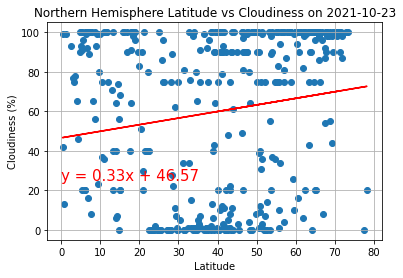

In [17]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig('output_data/NorthernHemisphereLatitudevsCloudiness.png')
plt.show()

The r-square is 0.07271553982869434
y = 0.23x + 57.6


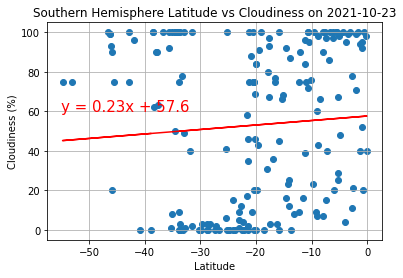

In [18]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig('output_data/SouthernHemisphereLatitudevsCloudiness.png')
plt.show()

The r-square is 0.21447510505816333
y = 0.06x + 5.0


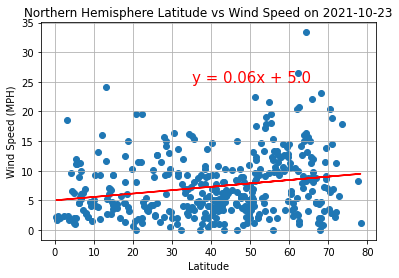

In [19]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig('output_data/NorthernHemisphereLatitudevsWindSpeed.png')
plt.show()

The r-square is -0.3281836904182248
y = -0.18x + 4.56


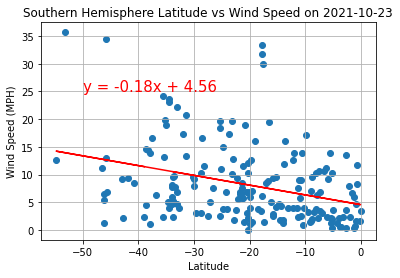

In [20]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig('output_data/SouthernHemisphereLatitudevsWindSpeed.png')
plt.show()

Written Description
1. There seems to be both a strong positive and negative correlation between temperature and latitude, depending on the hemisphere.
2. There seems to be no correlation between cloudiness and latitude. 
3. There seems to be little correlation between humidity and latitude. 